# Assignment 3: Classification with Logistic Regression  [ __ /130  marks]

<hr>
<!-- <img src=https://www.tibco.com/sites/tibco/files/media_entity/2020-09/logistic-regression-diagram.svg width=600> -->
<img src=https://miro.medium.com/max/1838/1*wWRGcsBwoXw-WNJi5UpoOw.png width=600>
<hr>

In this assignment we will consider the `diabetes` dataset from kaggle: https://www.kaggle.com/kandij/diabetes-dataset

We will use logistic regression to classify subjects based on the input features; we will also evaluate our model with/without regularization.

## Before you start...
* check out the relevant lecture code (L3_codeF.ipynb) for reference

## Before you submit...
* restart the kernel, then re-run the whole notebook to ensure no errors

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1.1 [ _ /4 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /10 marks]

Please answer the following short-answer questions `(a-d)`. Your answer can be brief (a few words or a sentence).

**(a) How many input features does this dataset have?**  

Your answer: There are altogether eight input features.

**(b) What is the dependent variable?** 

Your answer: Outcome is the dependent variable.

**(c) How many classes are there?**

Your answer: Two classes are there, i.e. either there Diabetes (1) or NO Diabetes (0) (also known as Binary class).

**(d) Is the dataset class-balanced? Check with some code.**

In [3]:
# ****** your code here ******
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Your answer: This is an imbalanced dataset as NO Diabetes features are 65.1% and Diabetes features are 34.9%.

## Question 1.3 [ _ /12 marks]

Split the data into train and test sets: Use `train_test_split` with `random_state=0`. Use 50% of the data for training and 50% for testing.

In [4]:
# Store the input values into a variable called "X" [ /4 marks]
# ****** your code here ******
X = diabetes.iloc[:,0:8].values

# Convert 0's and 1's to "Pos" and "Neg" class labels. Store the output class values into variable "y" [ /6 marks]
# ****** your code here ******
y = diabetes.Outcome.replace(to_replace=[0,1], value=['Neg', 'Pos'])
# print(y)

# Split your X and y data using train_test_split [ /2 marks]
# ****** your code here ******
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)

## Question 1.4 [ _ /16 marks]

Consider sklearn's `LogisticRegression` class. Create a `LogisticRegression` object with `penalty=none`. Train and test this classifier using "Insulin" as the independent variable and "Outcome" as the dependent variable. Make a scatter plot of the points. Plot your prediction on the same graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


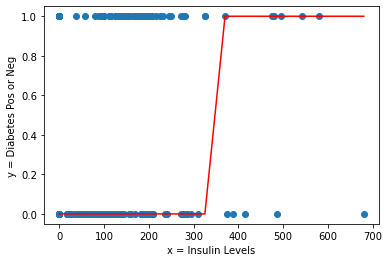

In [5]:
# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
diabeteslr = LogisticRegression(penalty='none')

# Create training data and test data for X [ /4 marks]
# ****** your code here ******
X= diabetes.Insulin.values
y= diabetes.Outcome.values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)

# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr.fit(X_train.reshape(-1,1),y_train)

# Create a scatter plot of the test data. Also plot your prediction. [ /8 marks]
# ****** your code here ******
plt.scatter(X_test,y_test)
y_pred= diabeteslr.predict(X_test.reshape(-1,1))
sns.lineplot(X_test,y_pred,color='red')
plt.xlabel("x = Insulin Levels")
plt.ylabel("y = Diabetes Pos or Neg")

#for roc curve
y_test_prob1=diabeteslr.predict_proba(X_test.reshape(-1,1))


## Question 1.5 [ _ /12 marks]

How many True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) were there from your classification test results in question 1.4? What was the test accuracy of your classifier? You can use the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [6]:
# Calculate tp, tn, fp, fn, and test accuracy
# ****** your code here ******
def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Accuracy:",accuracy)
# call function to get the values of TP TN FN FP     
compute_performance(y_pred,y_test,diabeteslr.classes_)


tp: 6 tn: 248 fp: 5 fn: 125
Accuracy: 0.6614583333333334


## Question 1.6 [ _ /18 marks]

Now try adjusting the decision threshold to 0.35 (instead of the default, which is 0.5). Report TP, TN, FP, FN, and Accuracy.

In [7]:
# Using your fit from question 1.4, adjust the decision threshold and get the updated predictions [ /6 marks]
# ****** your code here ******
y_test_prob = diabeteslr.predict_proba(X_test.reshape(-1,1))
y_hat=diabeteslr.classes_[(y_test_prob[:,1]>0.35).astype("int")]

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
# call function to get the values of TP TN FN FP     
compute_performance(y_hat,y_test,diabeteslr.classes_)

tp: 58 tn: 174 fp: 79 fn: 73
Accuracy: 0.6041666666666666


## Question 1.7 [ _ /6 marks]

What happens when the threshold is lowered from question 1.5 to question 1.6? Could one model be more useful than the other? Answer in a few sentences.

Your answer: In contract from Q1.5 to Q1.6, the True Positive cases went up by a significant amount, i.e. from 6 to 58, where as the True Negative cases dropped from 248 to 174. Additionally, the False Positive and Flase negative cases differ significantly. Finally, the accuracy dropped from 0.661 to 0.604, which indicated that the accuracy lowered with lowering the decision threshold.
Yes, in this perticular case, the Flase Negative values are to be noted, as there are more patients being wrongfully diagnosed with diabetes, I believe that the model in Q1.7 fits better to our scenario as the Flase Negative are significantly lower.

## Question 1.8 [ _ /18 marks]

Create another `LogisticRegression` object with `penalty=none`. Train and test this classifier, this time using all input features. Calculate TP, FP, TN, FN, and Accuracy.

In [8]:
X = diabetes.iloc[:,0:8].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)
# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
diabeteslr_f = LogisticRegression(penalty='none',max_iter=10000)

# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr_f.fit(X_train,y_train)

# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred= diabeteslr_f.predict(X_test)

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,diabeteslr_f.classes_)

#for roc curve
y_test_prob2=diabeteslr_f.predict_proba(X_test)

tp: 75 tn: 228 fp: 25 fn: 56
Accuracy: 0.7890625


## Question 1.9 [ _ /20 marks]

Create a final `LogisticRegression` object with `penalty=l2`, `C=0.01`. Train and test this classifier using all input features. Calculate TP, FP, TN, FN, and Accuracy. Did regularization help in this case? 

In [9]:
# Create a LogisticRegression object with l2 regularization [ /2 marks]
# ****** your code here ******
diabeteslr_ff = LogisticRegression(max_iter=10000,penalty="l2",C=0.01)
# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr_ff.fit(X_train,y_train)
# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred= diabeteslr_ff.predict(X_test)
# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,diabeteslr_ff.classes_)

#for roc curve
y_test_prob3=diabeteslr_ff.predict_proba(X_test)

tp: 74 tn: 228 fp: 25 fn: 57
Accuracy: 0.7864583333333334


Your answer: The finaly accuracy values are similar with and without regularization. The confusion matrix values are similar as well. There isnt much of a notable positive difference. In conclusion, No, regularization did not help in this case.


## Question 2.1 [ _ /14 marks]

Plot ROC Curves for the classifiers you used in questions 1.4, 1.8, and 1.9. Use AUC to determine which classifier is the best. State the best classifier.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.5322994297438373
0.8481127236520533
0.8391515553812268


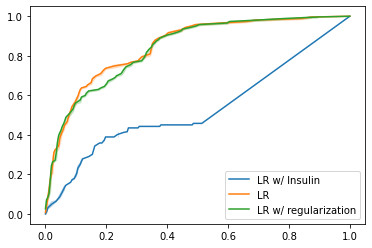

In [10]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers [ /6 marks]
# ****** your code here ******
fpr1,tpr1,_=roc_curve(y_test,y_test_prob1[:,1])
fpr2,tpr2,_=roc_curve(y_test,y_test_prob2[:,1])
fpr3,tpr3,_=roc_curve(y_test,y_test_prob3[:,1])

# Plot all of the ROC curves [ /3 marks]
# ****** your code here ******
sns.lineplot(fpr1,tpr1)
sns.lineplot(fpr2,tpr2)
sns.lineplot(fpr3,tpr3)

# Determine AUC for each of the ROC curves [ /3 marks]
# ****** your code here ******
print(auc(fpr1,tpr1))
print(auc(fpr2,tpr2))
print(auc(fpr3,tpr3))
plt.legend(["LR w/ Insulin","LR","LR w/ regularization"])
plt.show()

Your answer: Based on the above ROC curves, The orange ROC curve (Q1.8) fits best and thus it's the best classifier.